# Principal Components Analysis

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
%matplotlib inline  

# Some of these examples/code from: S. Raschka. Python Machine Learning. Packt Publishing Ltd., 2015.

In [6]:
#Load data, subtract mean, etc
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
X,y     = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
sc      = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std  = sc.fit_transform(X_test)
print(X_train_std.shape)

(124, 13)


In [7]:
#compute covariance, eigenvals and eigenvecs
cov_mat = np.cov(X_train_std.T)
print(cov_mat)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)

[[ 1.00813008  0.13773981  0.26328998 -0.25849036  0.28011764  0.27573232
   0.23271784 -0.09845197  0.09793343  0.59398508 -0.16030306  0.00886053
   0.65082436]
 [ 0.13773981  1.00813008  0.19966266  0.27479403 -0.04767754 -0.381091
  -0.46074292  0.34068855 -0.23392255  0.29612286 -0.55859636 -0.3943154
  -0.15716403]
 [ 0.26328998  0.19966266  1.00813008  0.48039567  0.31005759  0.18556654
   0.1276878   0.1774477   0.13742605  0.27651624 -0.13638177  0.00949114
   0.27085526]
 [-0.25849036  0.27479403  0.48039567  1.00813008  0.01412144 -0.27347609
  -0.33433945  0.37402619 -0.04547806  0.06127048 -0.25679134 -0.26097989
  -0.37268052]
 [ 0.28011764 -0.04767754  0.31005759  0.01412144  1.00813008  0.19450675
   0.16272408 -0.29279662  0.21055811  0.16855569  0.05071118  0.04069274
   0.41479709]
 [ 0.27573232 -0.381091    0.18556654 -0.27347609  0.19450675  1.00813008
   0.87275575 -0.42391438  0.59834357 -0.0394718   0.44813665  0.66800571
   0.51782964]
 [ 0.23271784 -0.46074292

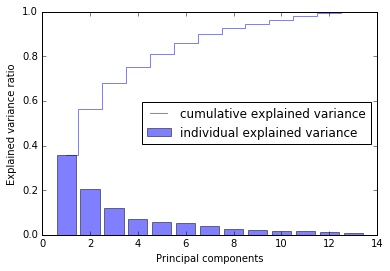

In [8]:
#compute explained variance and plot
tot         = sum(eigen_vals)
var_exp     = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')	
plt.step(range(1,14), cum_var_exp, alpha=0.5, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

Matrix W:
 [[ 0.10362572 -0.48998246]
 [-0.2658368  -0.21793148]
 [ 0.00832862 -0.35807942]
 [-0.20782712 -0.04267726]
 [ 0.12615165 -0.29545285]
 [ 0.39220359 -0.11275367]
 [ 0.43084856 -0.03657821]
 [-0.29549328 -0.02041911]
 [ 0.29697482 -0.07711832]
 [-0.12471466 -0.49524073]
 [ 0.32245881  0.27554328]
 [ 0.38289547  0.13846608]
 [ 0.27983917 -0.36648681]]
[[  4.68452595e+00  -1.31568808e-15]
 [ -1.31568808e-15   2.67512556e+00]]
(124, 2)


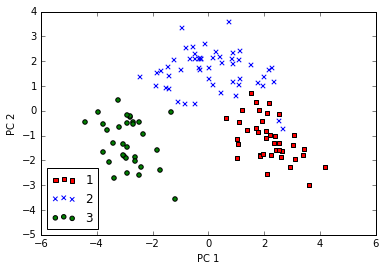

In [9]:
#perform dimensionality reduction
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

X_train_pca = X_train_std.dot(w)
cov_mat = np.cov(X_train_pca.T)
print(cov_mat)
print(X_train_pca.shape)
colors = ['r','b','g']
markers = ['s', 'x', 'o']
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

[[ 4.89563503 -0.41056437]
 [-0.41056437  2.06099781]]


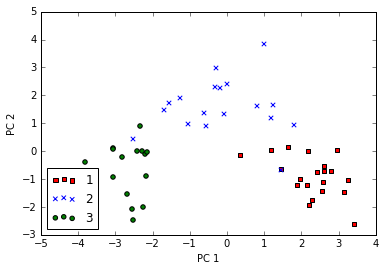

In [10]:
X_test_pca = X_test_std.dot(w)
cov_mat = np.cov(X_test_pca.T)
print(cov_mat)
for l,c,m in zip(np.unique(y_test), colors, markers):
    plt.scatter(X_test_pca[y_test==l,0],X_test_pca[y_test==l,1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

Dataset consists of 400 faces


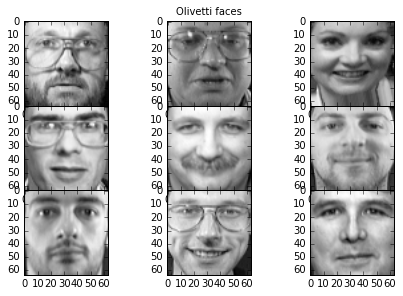

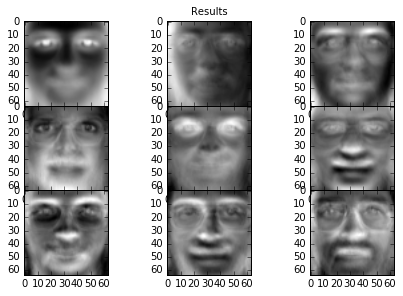

In [11]:
#Eigenfaces
#Part of example from: http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

n_row, n_col = 3, 3
n_components = n_row * n_col
image_shape = (64, 64)

# Load faces 
dataset = fetch_olivetti_faces(shuffle=True)
faces = dataset.data
n_samples, n_features = faces.shape

print("Dataset consists of %d faces" % n_samples)

#Define function to plot imagery
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure()
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        comp = comp.reshape((64,64))
        plt.imshow(comp,cmap='gray')
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

scikit_pca = PCA(n_components = n_components, whiten=True)
X_spca = scikit_pca.fit_transform(faces.T)

plot_gallery("Olivetti faces", faces[0:n_components,:])
plot_gallery('Results', X_spca.T)


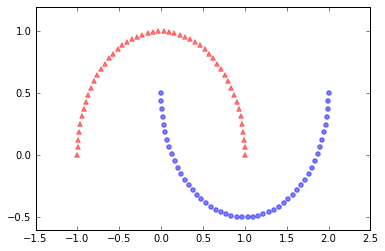

In [12]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y==0,0], X[y==0, 1], color='red', marker = '^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1, 1], color='blue', marker = 'o', alpha=0.5)
plt.show()

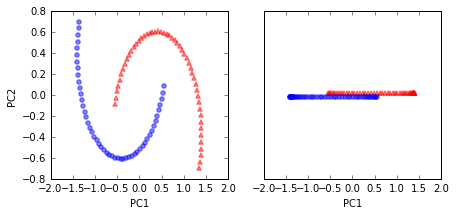

In [13]:
# Apply standard PCA
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_spca[y==0,0], X_spca[y==0,1], color='red', marker = '^', alpha=0.5)
ax[0].scatter(X_spca[y==1,0], X_spca[y==1,1], color='blue', marker = 'o', alpha=0.5)
ax[1].scatter(X_spca[y==0,0], np.zeros((50,1))+0.02, color='red', marker = '^', alpha=0.5)
ax[1].scatter(X_spca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker = 'o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()